## Data Exploration

In this notebook, we'll take the opportunity to explore the data we will be using.  Data exploration and understanding is a fundamental step in Machine Learning.

In this learning path, the data we'll be looking at is the Diabetes data set.  It consists of ~800 rows of medical data (e.g. blood pressure, heart rate etc...) for female patients with and without diabetes.  It is worth mentioning that in ML, 800 examples is considered a very very small dataset.  We'll be creating a model that will help us determine which of our patients, based on their medical data, may have diabetes.

It is helpful to know a few characteristics about the dataset in this lab.  Specifically how it is laid out.  In the Diabetes dataset we have provided, we have done some preprocessing of the data.  The data you will be provided with is in CSV format.  There are no patient names provided in this dataset.

This dataset will be used to train the model to recognize which medical data (e.g. blood pressure, blood values) are common in patients who have diabetes.

At the end of this notebook, we'll have a better understanding of what our data looks like, and that will help us when constructing the AI in the future notebook.

To start, let's load the data!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load diabetes dataset into a dataframe called 'df'
df = pd.read_csv("data/diabetes.csv")

#Obtain the length (rows) and shape (columns) of our dataset
len(df)
df.shape

(768, 9)

We see that there are 769 rows and 9 columns.  

## Data Analysis
Let's analyze our data closer using some standard data analysis methods available in python.  A useful method is info() which will show us the column names and data types in our dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see the column names and associated data types.  Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age and Outcome are of data type integer (e.g. 34, 2, 98).

BMI and Diabetes PedigreeFuntion are of data type float (e.g. 1.3, 4.56)

Let's use the describe() function to learn statistical information (e.g. mean, standard deviation, min, max...) for each of our columns.

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see that there are 769 entries in our dataset.  There are 9 columns and they are all non-null.

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

* Pregnancies    - Number of times pregnant
* Glucose        - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* Blood Pressure - Diastolic blood pressure (mm Hg)
* SkinThickness  - Triceps skin fold thickness (mm)
* Insulin        - 2-Hour serum insulin (mu U/ml)
* BMI            - Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age            - Age (years)
* Outcome        - Class variable (0 or 1) 268 of 768 are 1, the others are 0


Let's now look at our data using a series of histograms and plots in order to see how 'distributed' our data appears.  We can do this using the hist() function to visually see how our data is distributed for each column in our data set.  This will allow us to determine if any of the columns have 'outliers'.  

Outliers are data points that differ significantly from other data points.  They can be due to a variability in measurement or may even indicate a measurement error. It is up to the Data Engineer (or Data Scientist) to determine if the outlier(s) are considered abnormal and should be removed or kept within the dataset. 


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

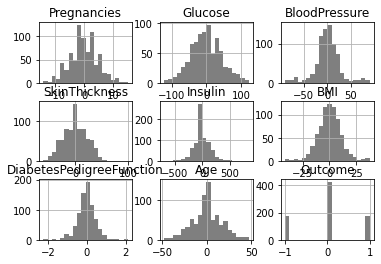

In [5]:
#plot histograms of the columns on multiple subplots
plt.close('all')

df.diff().hist(color="k", alpha=0.5, bins=20)

From the above histograms we can see that our dataset is evenly distributed except for some outliers in BMI, Outcomes and DiabetesPedigreeFunction.  For now we will keep the outliers in our dataset.


Let's take a closer look at the actual values in our dataset.  A method we can use to examine the first 20 rows of data (plus the column names) is the head() function. Using df.head() we can see the column names of our dataframe:  Pregnancies, Glucose, BloodPressure, Skinthickness, Insulin, BMI, 
DiabetespedigreeFunction, Age and Outcome

In [6]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


If we look closely we see that there are '0' values found for Insulin levels and skin thickness.  The 0 values indicate that we have missing or null data.  Let's check the last 20 rows of our dataset and determine if there are any '0' values present.

In [7]:
#Let's examine the last 20 rows of our dataframe
df.tail(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
748,3,187,70,22,200,36.4,0.408,36,1
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1


In the last 20 rows of our dataset, there are also '0' values present for Insulin and SkinThickness.  Therefore, it is likely that there are more '0' values present throughout our dataset.

Let's determine how many '0' values are present in our dataset.  

In [8]:
#Determine the number of '0' values
df2 = df.iloc[:, :-1]

#number & percent of '0's for each attribute
numZero = (df2[:] == 0).sum()
perZero = ((df2[:] == 0).sum())/768*100

print("\nRows, Columns: ",df2.shape)
print("\nNumber of 0's:")
print(numZero)
print("\nPercentage of 0's:")
print(perZero)


Rows, Columns:  (768, 8)

Number of 0's:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

Percentage of 0's:
Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64



There are 227 Zero values for SkinThickness and 374 Zero values (or ~50%) for Insulin.  If we want to build and train a model we need to address these '0' values.  We need to ask ourselves if the missing data values are in some way related (correlated) to each other.  Let's look for correlations in our dataset.

## Looking for Correlations

Because our dataset is small we can compute the 'standard correlation coefficient' between every pair of attributes using corr()

In [9]:
corrM = df.corr()
corrM

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


When the coefficient is close to 1 it means there is a strong positive correlation.  When we take a look at our data we don't see any attributes that are highly correleated, even our 0 value attributes Insulin & SkinThickness only have a correlation value of 0.436783.  Even though there is not high correleation, the zero values are still eraneous and we shouldn't include them in our model.  Is this a common problem faced?  And how is it solved?  

This is a common problem.  And when dealing with missing data, data scientists can use two primary methods to solve the error: imputation or the removal of data. Imputation develops reasonable guesses for missing data such as replacing these values with a median measurement.  But what we don't want to do this before we break the dataset into training and testing sets for our model.  Let's leave this issue until then. In the meantime, since we are fairly happy with our Data Analysis, we can go to the next step (of model development) which is feature engineering.  

Open notebook 02-feature-engineering.ipynb to continue.

